In [ ]:
import numpy as np
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from pre_processing import Unlabelled_Remover, Intensity_normalizer, Pipeline, Unsharper, Mask_Integrater, skly_normalizer, MinMax_normalizer, Mask_Contour_Fillier, Cropper

from utils import ridgeline, load_images, distribution_per_center, calculate_similarity

import sys
sys.path.append('../') # change current path to parent dir

# Base directory of your dataset
base_dir = '../FAME2labelling'
images = load_images(base_dir)

In [2]:
preprocessor_pipe = Pipeline(
        steps=[
            (Unlabelled_Remover, None),
            (Mask_Integrater, None),
            (Mask_Contour_Fillier, None),
            (Cropper, {"border_ratio":0.3, "thresh":30}),
            (Unsharper, {"radius": 60, "amount":3, "preserve_range" : True}),
            (Intensity_normalizer,None),
        ],
    )
clean_images = preprocessor_pipe.fit_transform(images)

Processing step: Unlabelled_Remover
Processing step: Mask_Integrater
Processing step: Mask_Contour_Fillier
Processing step: Cropper
Processing step: Unsharper
Processing step: Intensity_normalizer


<Figure size 800x900 with 0 Axes>

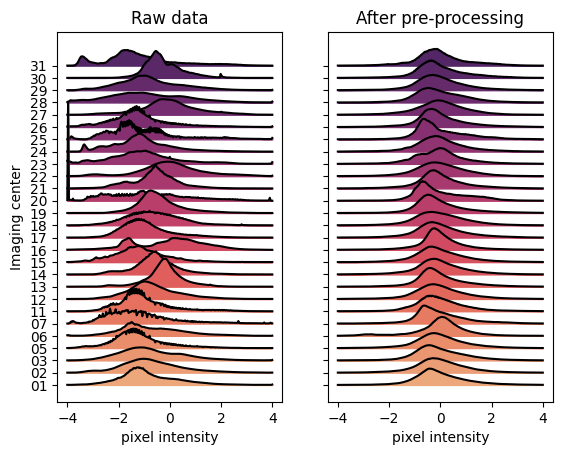

In [88]:
plt.figure(figsize=(8, 9))
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
hospital_data, hospital_means = distribution_per_center(images)
ridgeline(hospital_means, plot=ax[0])
ax[0].set_title("Raw data")
hospital_data_clean, hospital_means_clean = distribution_per_center(clean_images, scaled=True)
ridgeline(hospital_means_clean, plot=ax[1])
ax[1].set_title("After pre-processing")

ax[0].set_xlabel('pixel intensity')
ax[1].set_xlabel('pixel intensity')
ax[0].set_ylabel('Imaging center')
# plt.suptitle("Comparison of Hospital Image Intensity Distributions")
plt.savefig("normalisation.png", dpi=600, bbox_inches="tight")
plt.show()

In [ ]:
import os
IMAGE_DATASET_PATH = os.path.join("../dataset", "imgs")
MASK_DATASET_PATH = os.path.join("../dataset", "masks")
for k, v in clean_images.items() :
    with open(os.path.join(IMAGE_DATASET_PATH, k + ".npy"), 'wb') as f:
        np.save(f,v["raw"].astype(np.float32))
    with open(os.path.join(MASK_DATASET_PATH, k + ".npy"), 'wb') as f:
        np.save(f,v["labelled"]// 255)